In [1]:
import torch
from sklearn.decomposition import PCA, IncrementalPCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer


In [2]:
embedding_data = torch.load('embeddings/embeddings/embeddings_train.pt')

In [3]:
embedding_data.shape

torch.Size([57, 452, 128])

In [4]:
reshaped_embedding_data = embedding_data.view(-1, 128)
reshaped_embedding_array = reshaped_embedding_data.numpy()
n_components = 2
pca = PCA(n_components=n_components)
embedding_data_reduced = pca.fit_transform(reshaped_embedding_array)
embedding_data_reduced = embedding_data_reduced.reshape(57, 452, n_components)

In [5]:
reshaped_embedding_data.shape

torch.Size([25764, 128])

In [6]:
flattened_data_reduced = embedding_data_reduced.reshape(-1, 2)

kmeans = KMeans(n_clusters=8, random_state=42)
kmeans.fit(flattened_data_reduced)

cluster_labels = kmeans.labels_

cluster_labels_reshaped = cluster_labels.reshape(57, 452)

C:\Users\akash\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


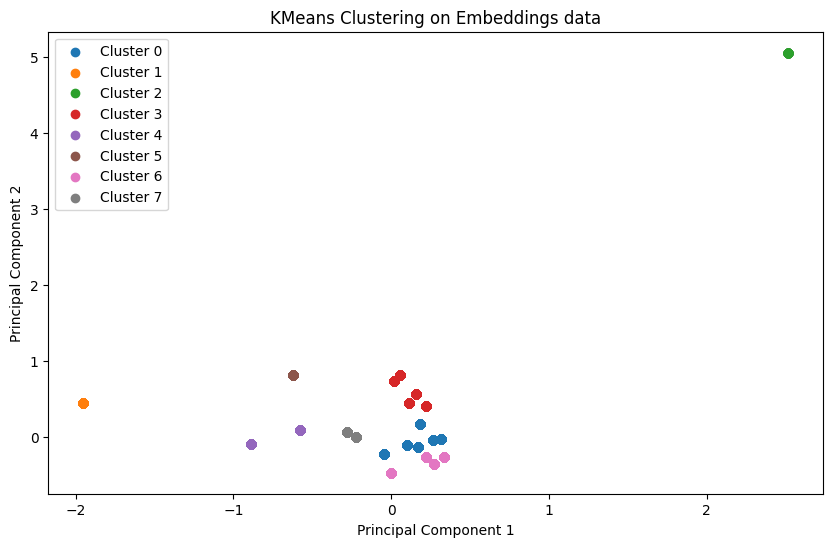

In [7]:
plt.figure(figsize=(10, 6))
for cluster in range(8):
    cluster_data = embedding_data_reduced[cluster_labels_reshaped == cluster]
    plt.scatter(cluster_data[:, 0], cluster_data[:, 1], label=f'Cluster {cluster}')

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('KMeans Clustering on Embeddings data')
plt.legend()
plt.show()

In [3]:
embedding_wimp_data = torch.load('embeddings/embeddings/embeddings_with_importances.pt')

In [31]:
embedding_wimp_data.shape

(3529668, 130)

In [32]:
embedding_wimp_data = pd.DataFrame(embedding_wimp_data)

# Remove rows containing NaN values
embedding_wimp_data_cleaned = embedding_wimp_data.dropna()

embedding_wimp_data_cleaned = torch.tensor(embedding_wimp_data_cleaned.values)

In [33]:
n_components = 2 
batch_size = 10000
ipca = IncrementalPCA(n_components=n_components, batch_size=batch_size)
reduce_embeddings = ipca.fit_transform(embedding_wimp_data_cleaned)

C:\Users\akash\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\akash\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\akash\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\U

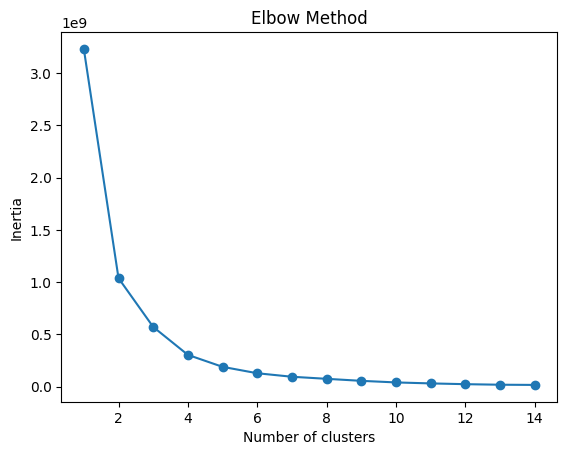

In [34]:
inertias = []
for k in range(1, 15):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(reduce_embeddings)
    inertias.append(kmeans.inertia_)

plt.plot(range(1, 15), inertias, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

From the inertia plot, cluster size of 8 seems a reasonable.

C:\Users\akash\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


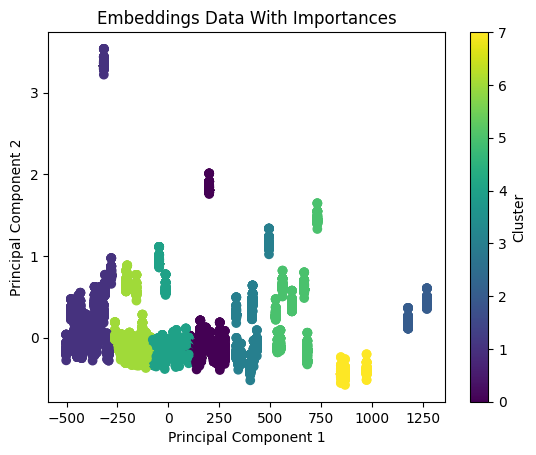

In [35]:
kmeans = KMeans(n_clusters=8)
labels = kmeans.fit_predict(reduce_embeddings)

#Plot the Clusters
plt.scatter(reduce_embeddings[:, 0], reduce_embeddings[:, 1], c=labels, cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Embeddings Data With Importances')
plt.colorbar(label='Cluster')
plt.show()